In [3]:
import warnings

import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv("suicide_rate.csv")
data["country-year"] = data["country-year"].str[-4::].astype(int)

In [25]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,1987,NaN,"2,156,624,900",796,Generation X


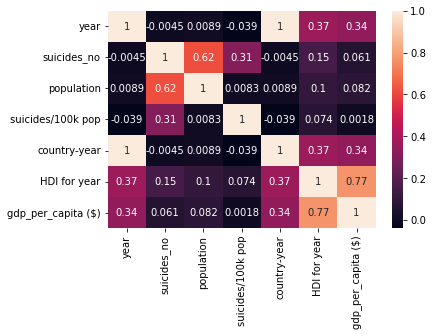

In [166]:
sns.heatmap(data.corr(), annot = True);

In [167]:
data = data.drop(["HDI for year"], axis = 1)

In [168]:
label_enc = []

for column in data:
    if data[column].dtype == "object":
        labEnc = LabelEncoder()
        data[column] = labEnc.fit_transform(data[column])
        label_enc.append(labEnc)

In [169]:
for le in label_enc:
    print(le.classes_)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [170]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,0,21,312900,6.71,1987,726,796,2
1,0,1987,1,2,16,308000,5.19,1987,726,796,5
2,0,1987,0,0,14,289700,4.83,1987,726,796,2
3,0,1987,1,5,1,21800,4.59,1987,726,796,1
4,0,1987,1,1,9,274300,3.28,1987,726,796,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,0,2,107,3620833,2.96,2014,1936,2309,2
27816,100,2014,0,5,9,348465,2.58,2014,1936,2309,5
27817,100,2014,1,3,60,2762158,2.17,2014,1936,2309,3
27818,100,2014,0,3,44,2631600,1.67,2014,1936,2309,3
